In [ ]:
import numpy as np 
import pandas as pd

data = pd.read_csv('3.csv')
concepts = np.array(data.iloc[:,0:-1])
print("\nInstances are:\n",concepts)
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)

def learn(concepts, target): 
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)  

    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)): 
                if h[x]!= specific_h[x]:                    
                    specific_h[x] ='?'                     
                    general_h[x][x] ='?'
                   
        if target[i] == "no":            
            print("Instance is Negative ")
            for x in range(len(specific_h)): 
                if h[x]!= specific_h[x]:                    
                    general_h[x][x] = specific_h[x]                
                else:                    
                    general_h[x][x] = '?'        
        
        print("Specific Bundary after ", i+1, "Instance is ", specific_h)         
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]    
    for i in indices:   
        general_h.remove(['?', '?', '?', '?', '?', '?']) 
    return specific_h, general_h 

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Instances are:
 [['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]

Target Values are:  ['yes' 'yes' 'no' 'yes']

Initialization of specific_h and genearal_h

Specific Boundary:  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Instance is Positive 
Specific Bundary after  1 Instance is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]





In [ ]:
import csv
a = []
with open('4.csv', 'r') as csvfile:
    next(csvfile)
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)

print("\nThe total number of training instances are : ",len(a))

num_attribute = len(a[0])-1

print("\nThe initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        print ("\nInstance ", i+1, "is", a[i], " and is Positive Instance")
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

    if a[i][num_attribute] == 'no':
        print ("\nInstance ", i+1, "is", a[i], " and is Negative Instance Hence Ignored")
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

print("\nThe Maximally specific hypothesis for the training instance is ", hypothesis)

[['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'], ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

The total number of training instances are :  4

The initial hypothesis is : 
['0', '0', '0', '0', '0', '0']

Instance  1 is ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 1  is:  ['sunny', 'warm', 'normal', 'strong', 'warm', 'same'] 


Instance  2 is ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']  and is Positive Instance
The hypothesis for the training instance 2  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  3 is ['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 3  is:  ['sunny', 'warm', '?', 'strong', 'warm', 'same'] 


Instance  4 is ['s

In [ ]:
import pandas as pd
import math
import numpy as np

data = pd.read_csv("5.csv")
features = [feat for feat in data]
print(features)
features.remove("answer")
print(features)
class Node:
    def __init__(self):
        self.children = []
        self.value = ""
        self.isLeaf = False
        self.pred = ""
def entropy(examples):
    pos = 0.0
    neg = 0.0
    for _, row in examples.iterrows():
        if row["answer"] == "yes":
            pos += 1
        else:
            neg += 1
    if pos == 0.0 or neg == 0.0:
        return 0.0
    else:
        p = pos / (pos + neg)
        n = neg / (pos + neg)
        return -(p * math.log(p, 2) + n * math.log(n, 2))
def info_gain(examples, attr):
    uniq = np.unique(examples[attr])
    #print ("\n",uniq)
    gain = entropy(examples)
    #print ("\n",gain)
    for u in uniq:
        subdata = examples[examples[attr] == u]
        #print ("\n",subdata)
        sub_e = entropy(subdata)
        gain -= (float(len(subdata)) / float(len(examples))) * sub_e
        #print ("\n",gain)
    return gain
def ID3(examples, attrs):
    root = Node()

    max_gain = 0
    max_feat = ""
    for feature in attrs:
        #print ("\n",examples)
        gain = info_gain(examples, feature)
        if gain > max_gain:
            max_gain = gain
            max_feat = feature
    root.value = max_feat
    #print ("\nMax feature attr",max_feat)
    uniq = np.unique(examples[max_feat])
    #print ("\n",uniq)
    for u in uniq:
        #print ("\n",u)
        subdata = examples[examples[max_feat] == u]
        #print ("\n",subdata)
        if entropy(subdata) == 0.0:
            newNode = Node()
            newNode.isLeaf = True
            newNode.value = u
            newNode.pred = np.unique(subdata["answer"])
            root.children.append(newNode)
        else:
            dummyNode = Node()
            dummyNode.value = u
            new_attrs = attrs.copy()
            new_attrs.remove(max_feat)
            child = ID3(subdata, new_attrs)
            dummyNode.children.append(child)
            root.children.append(dummyNode)

    return root
def printTree(root: Node, depth=0):
    for i in range(depth):
        print("\t", end="")
    print(root.value, end="")
    if root.isLeaf:
        print(" -> ", root.pred)
    print()
    for child in root.children:
        printTree(child, depth + 1)
def classify(root: Node, new):
    for child in root.children:
        if child.value == new[root.value]:
            if child.isLeaf:
                print ("Predicted Label for new example", new," is:", child.pred)
                exit
            else:
                classify (child.children[0], new)
root = ID3(data, features)
print("Decision Tree is:")
printTree(root)
print ("------------------")

new = {"outlook":"sunny", "temperature":"hot", "humidity":"normal", "wind":"strong"}
classify (root, new)

['outlook', 'temperature', 'humidity', 'wind', 'answer']
['outlook', 'temperature', 'humidity', 'wind']
Decision Tree is:
outlook
	overcast ->  ['yes']

	rain
		wind
			strong ->  ['no']

			weak ->  ['yes']

	sunny
		humidity
			high ->  ['no']

			normal ->  ['yes']

------------------
Predicted Label for new example {'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'normal', 'wind': 'strong'}  is: ['yes']


In [ ]:
!pip install face_recognition


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=ffe357ae4b02fb1b77feb34090c1597b1813ca012e1b47ebb3e23352d66d47e7
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition as fr
import os
import cv2
import face_recognition
import numpy as np
from time import sleep


def get_encoded_faces():
    """
    looks through the faces folder and encodes all
    the faces

    :return: dict of (name, image encoded)
    """
    encoded = {}

    for dirpath, dnames, fnames in os.walk("/content/faces"):
        for f in fnames:
            if f.endswith(".jpg") or f.endswith(".png"):
                face = fr.load_image_file("/content/faces/" + f)
                encoding = fr.face_encodings(face)[0]
                encoded[f.split(".")[0]] = encoding

    return encoded


def unknown_image_encoded(img):
    """
    encode a face given the file name
    """
    face = fr.load_image_file("/content/faces/" + img)
    encoding = fr.face_encodings(face)[0]

    return encoding


def classify_face(im):
    """
    will find all of the faces in a given image and label
    them if it knows what they are

    :param im: str of file path
    :return: list of face names
    """
    faces = get_encoded_faces()
    faces_encoded = list(faces.values())
    known_face_names = list(faces.keys())

    img = cv2.imread(im, 1)
    #img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
    #img = img[:,:,::-1]
 
    face_locations = face_recognition.face_locations(img)
    unknown_face_encodings = face_recognition.face_encodings(img, face_locations)

    face_names = []
    for face_encoding in unknown_face_encodings:
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(faces_encoded, face_encoding)
        name = "Unknown"

        # use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(faces_encoded, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)

        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Draw a box around the face
            cv2.rectangle(img, (left-20, top-20), (right+20, bottom+20), (255, 0, 0), 2)

            # Draw a label with a name below the face
            cv2.rectangle(img, (left-20, bottom -15), (right+20, bottom+20), (255, 0, 0), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(img, name, (left -20, bottom + 15), font, 1.0, (255, 255, 255), 2)


    # Display the resulting image
    while True:
         print('done')

        #cv2.imshow('Video', img)
        #if cv2.waitKey(1) & 0xFF == ord('q'):
         return face_names 


print(classify_face("/content/test.jpg"))




done
['donald trump']


In [ ]:
import pandas as pd

msg=pd.read_csv('7.csv',names=['message','label']) 
print('Total instances in the dataset:',msg.shape[0])
msg['labelnum']=msg.label.map({'Yes':1,'No':0})
X=msg.message
Y=msg.labelnum

from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25) 
print('\nDataset is split into Training and Testing samples') 
print('Total training instances :', xtrain.shape[0]) 
print('Total testing instances :', xtest.shape[0])
from sklearn.feature_extraction.text import CountVectorizer #Convert a collection of text documents to a matrix of token counts.
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain) 
xtest_dtm = count_vect.transform(xtest)
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB().fit(xtrain_dtm,ytrain)
predicted=clf.predict(xtest_dtm)
from sklearn import metrics
print("\nAccuracy metrics")
print("\nAccuracy of the classifier is:",metrics.accuracy_score(ytest,predicted))
print("Recall:",metrics.recall_score(ytest,predicted))
print("Confusion matrix",metrics.confusion_matrix(ytest,predicted))

Total instances in the dataset: 14

Dataset is split into Training and Testing samples
Total training instances : 10
Total testing instances : 4

Accuracy metrics

Accuracy of the classifier is: 0.5
Recall: 1.0
Confusion matrix [[0 2]
 [0 2]]


In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Loading data
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.datasets import load_iris
#import matplotlib.pyplot as plt

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
#dataset = pd.read_csv("8-dataset.csv", names=names)
#X = dataset.iloc[:, :-1]  
#y = dataset.iloc[:, -1]
#print(X.head())
dataset =load_iris()
X=dataset.data
y=dataset.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10) 

classifier = KNeighborsClassifier(n_neighbors=5).fit(Xtrain, ytrain) 

ypred = classifier.predict(Xtest)

i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print("\n")
#print ("-------------------------------------------------------------------------")
for label in ytest:
    print ('%-25s %-25s' % (label, ypred[i]), end="")
    if (label == ypred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
    i = i + 1
print ("\n")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(ytest, ypred))  
print ("\n")
print("\nClassification Report:\n",metrics.classification_report(ytest, ypred)) 
print ("\n")
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(ytest,ypred))
#print ("-------------------------------------------------------------------------")




0.9666666666666667

-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            


2                         2                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
0                         0                         Correct                  
1                         1                         Correct                  
2                         2                         Correct                  
0                         0                         Correct                  
1                         1                         Correct                  
0                         0                         Correct                  
1                         1                         Correct                  
0                         0                   

Dataset: 
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0 

Confusion Matrix: 
 [[66  2]
 [ 8 24]]
Accuracy= 0.9


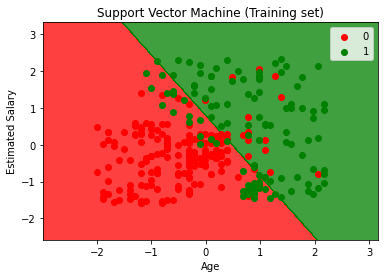

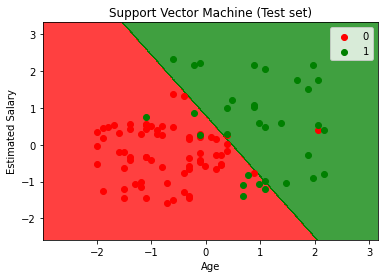

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the datasets

datasets = pd.read_csv('svm.csv')
print("Dataset:","\n",datasets.head(),"\n")
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Fitting the classifier into the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_Test, Y_Pred)
print("Confusion Matrix:","\n",cm)
acc=accuracy_score(Y_Test, Y_Pred)
print("Accuracy=",acc)

# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
pip install mchmm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import mchmm as mc
import pandas as pd
obs_seq = 'SWSCRWCSRSRSRSSWWWWCSWWCRW'
sts_seq = '00000000111111100000000000'
print(obs_seq)
print("\nS-Sunny\nW-Windy\nR-Rainy\nC-Cloudy\n")
print(sts_seq)
print("\n0-Sad\n1-Happy")
a = mc.HiddenMarkovModel().from_seq(obs_seq, sts_seq)
print("\nHidden States:\n",a.states)
print("\nObservations:\n",a.observations)
print("\nTransition Probability Matrix:\n",a.tp)
print("\nEmission Probability Matrix:\n")
pd.DataFrame(a.ep, index=a.states, columns=a.observations)
new_obs = "WRRWWWCRSWSSWSRW"
vs, vsi = a.viterbi(new_obs)
print("Predicted States: ", "".join(vs))



SWSCRWCSRSRSRSSWWWWCSWWCRW

S-Sunny
W-Windy
R-Rainy
C-Cloudy

00000000111111100000000000

0-Sad
1-Happy

Hidden States:
 ['0' '1']

Observations:
 ['C' 'R' 'S' 'W']

Transition Probability Matrix:
 [[0.94444444 0.05555556]
 [0.14285714 0.85714286]]

Emission Probability Matrix:

Predicted States:  0000000000000000


In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


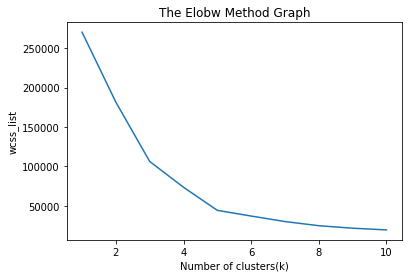


Number of clusters: 5


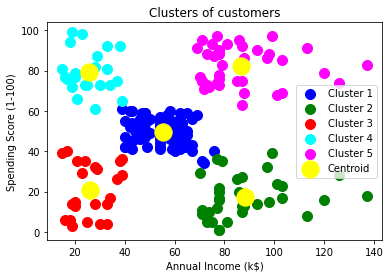

In [ ]:
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd
dataset = pd.read_csv('11.csv')
dataset.head()
x = dataset.iloc[:, [3, 4]].values 
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

from kneed import KneeLocator 
kl = KneeLocator(range(1, 11), wcss_list, curve="convex", direction="decreasing")
print("\nNumber of clusters:",kl.elbow)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/20
235/235 [==============================] - 4s 12ms/step - loss: 0.3116 - val_loss: 0.2258
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2013 - val_loss: 0.1838
Epoch 3/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1756 - val_loss: 0.1662
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1614 - val_loss: 0.1553
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1532 - val_loss: 0.1494
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1486 - val_loss: 0.1459
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1457 - val_loss: 0.1434
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1435 - val_loss: 0.1413
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1418 - val_loss: 0.1397


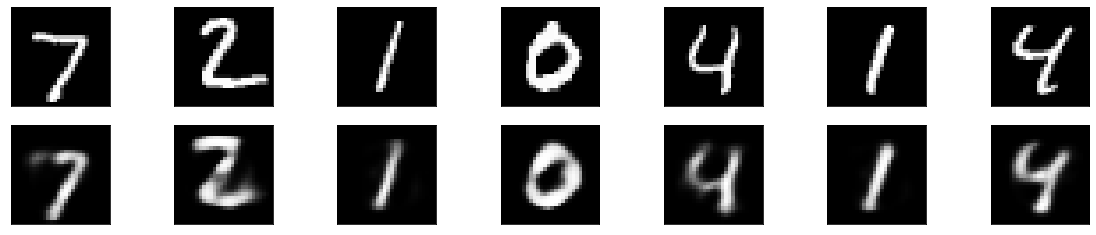

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                validation_data=(x_test, x_test))
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(7):
    # Display original
    ax = plt.subplot(2, 7, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 7, i + 1 + 7)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

[0.72770452 0.23030523]


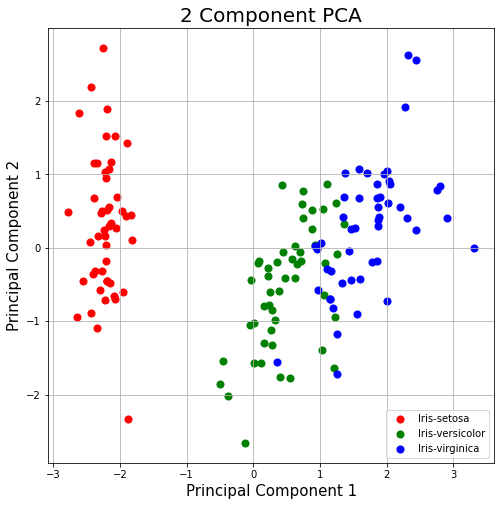

In [ ]:
# -*- coding: utf-8 -*-
"""PCA.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/14EkI0iARudQUdWzq1gWSBsRfXpi5eX8T
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# %matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

df.head()

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)

df[['target']].head()

finalDf=pd.concat([principalDf,df[['target']]],axis=1)
finalDf.head()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print(pca.explained_variance_ratio_)

